# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Hapus simbol pagar (#) jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [34]:
#Type your code here
import itertools
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 10 baris pertama dengan function `head()`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info()`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe()`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [35]:
# Tampilkan 10 baris pertama dengan function head.
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
data = pd.read_csv(url)
data.head(10)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39
5,TX000006,AC00393,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,D000579,117.67.192.211,M054,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 08:06:36
6,TX000007,AC00199,7.08,2023-02-15 16:36:48,Credit,Seattle,D000241,140.212.253.222,M019,ATM,37.0,Doctor,139.0,1.0,13316.71,2024-11-04 08:10:09
7,TX000008,AC00069,171.42,2023-05-08 17:47:59,Credit,Indianapolis,D000500,92.214.76.157,M020,Branch,67.0,Retired,291.0,1.0,2796.24,2024-11-04 08:10:55
8,TX000009,AC00135,106.23,2023-03-21 16:59:46,Credit,Detroit,D000690,24.148.92.177,M035,Branch,51.0,Engineer,86.0,1.0,9095.14,2024-11-04 08:11:14
9,TX000010,AC00385,815.96,2023-03-31 16:06:57,Debit,Nashville,D000199,32.169.88.41,M007,ATM,55.0,Doctor,120.0,1.0,1021.88,2024-11-04 08:06:32


In [36]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [37]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
data.describe(include="all")

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2508,2516,2511.000000,2509,2507,2507,2507,2517,2514,2510,2519.000000,2514,2511.000000,2516.000000,2510.000000,2513
unique,2484,495,NaN,2485,2,43,681,591,100,3,NaN,4,NaN,NaN,NaN,360
top,TX001748,AC00362,NaN,2023-10-20 17:53:13,Debit,Fort Worth,D000573,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,2,12,NaN,2,1942,71,9,12,46,868,NaN,657,NaN,NaN,NaN,18
mean,NaN,NaN,297.656468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.678444,NaN,119.422939,1.121622,5113.438124,NaN
std,NaN,NaN,292.230367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.837359,NaN,70.078513,0.594469,3897.975861,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.310000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.727500,NaN
50%,NaN,NaN,211.360000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.000000,1.000000,4734.110000,NaN
75%,NaN,NaN,413.105000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7672.687500,NaN


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [38]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
numerik_columnns = data.select_dtypes(include=['float64', 'int64'])
numerik_columnns.corr()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
TransactionAmount,1.000000,-0.024428,0.004782,-0.007397,-0.026310
CustomerAge,-0.024428,1.000000,-0.009852,0.007876,0.321161
TransactionDuration,0.004782,-0.009852,1.000000,0.030076,0.006859
LoginAttempts,-0.007397,0.007876,0.030076,1.000000,0.009088
AccountBalance,-0.026310,0.321161,0.006859,0.009088,1.000000


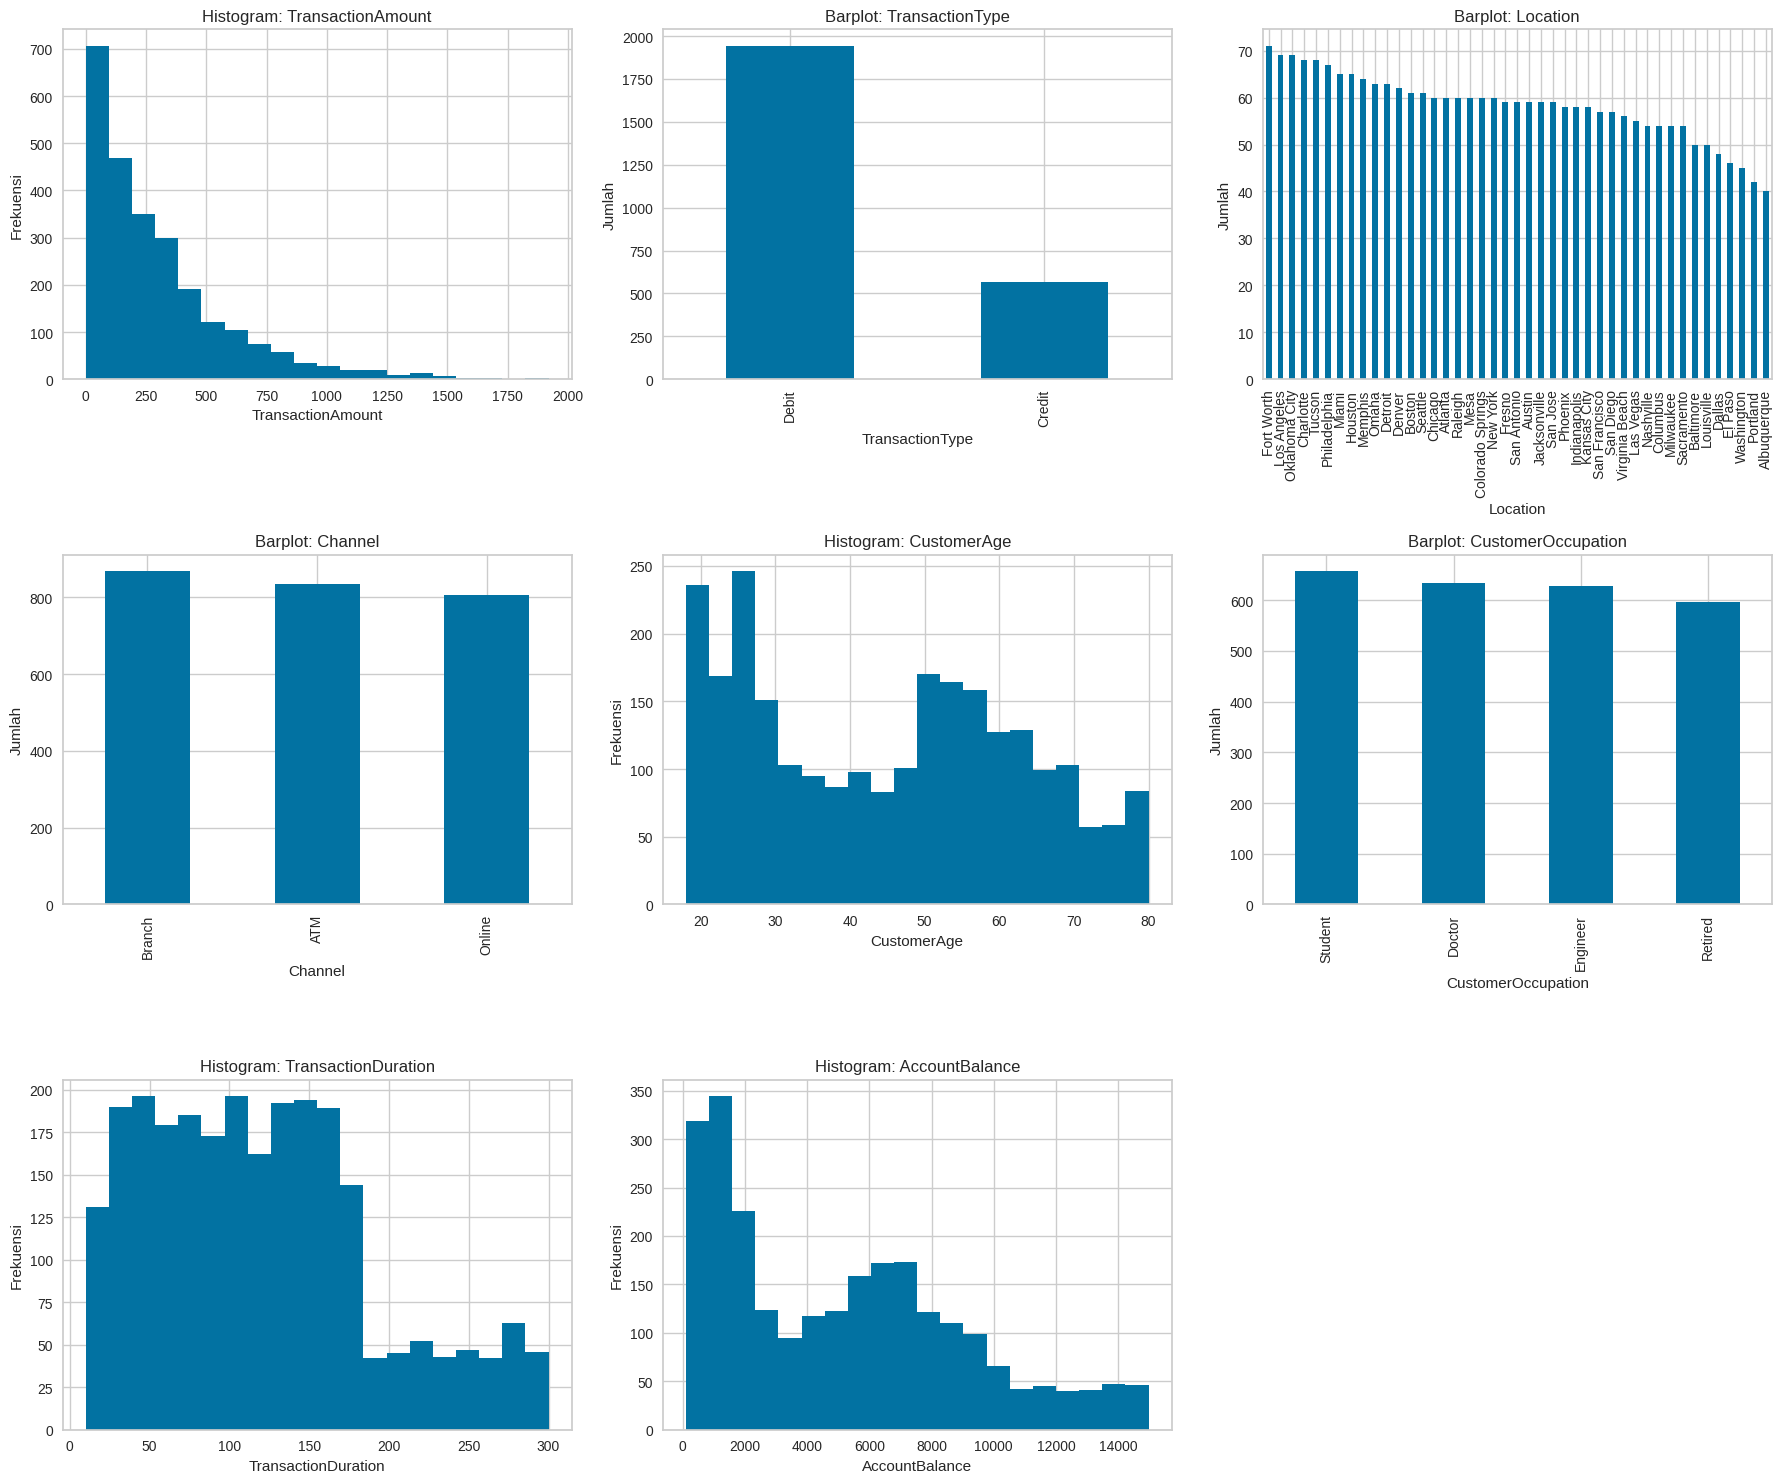

In [39]:
# Saya menghapus semua kolom yang variasinya terlalu banyak. Dan menghapus kolom yang nilai nya sama semua
data_for_histogram = data.drop(['TransactionID', 'AccountID', 'TransactionDate', 'IP Address', 'DeviceID', 'MerchantID', 'PreviousTransactionDate', 'LoginAttempts'], axis=1)

# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
num_cols = data_for_histogram.shape[1]
cols_per_row = 3
rows = (num_cols // cols_per_row) + 1

plt.figure(figsize=(18, 5 * rows))

for i, col in enumerate(data_for_histogram.columns):
  plt.subplot(rows, cols_per_row, i + 1)
  if data_for_histogram[col].dtype in ['float64', 'int64']:
    data_for_histogram[col].hist(bins=20)
    plt.title(f'Histogram: {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
  else:
    data_for_histogram[col].value_counts().plot(kind='bar')
    plt.title(f'Barplot: {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

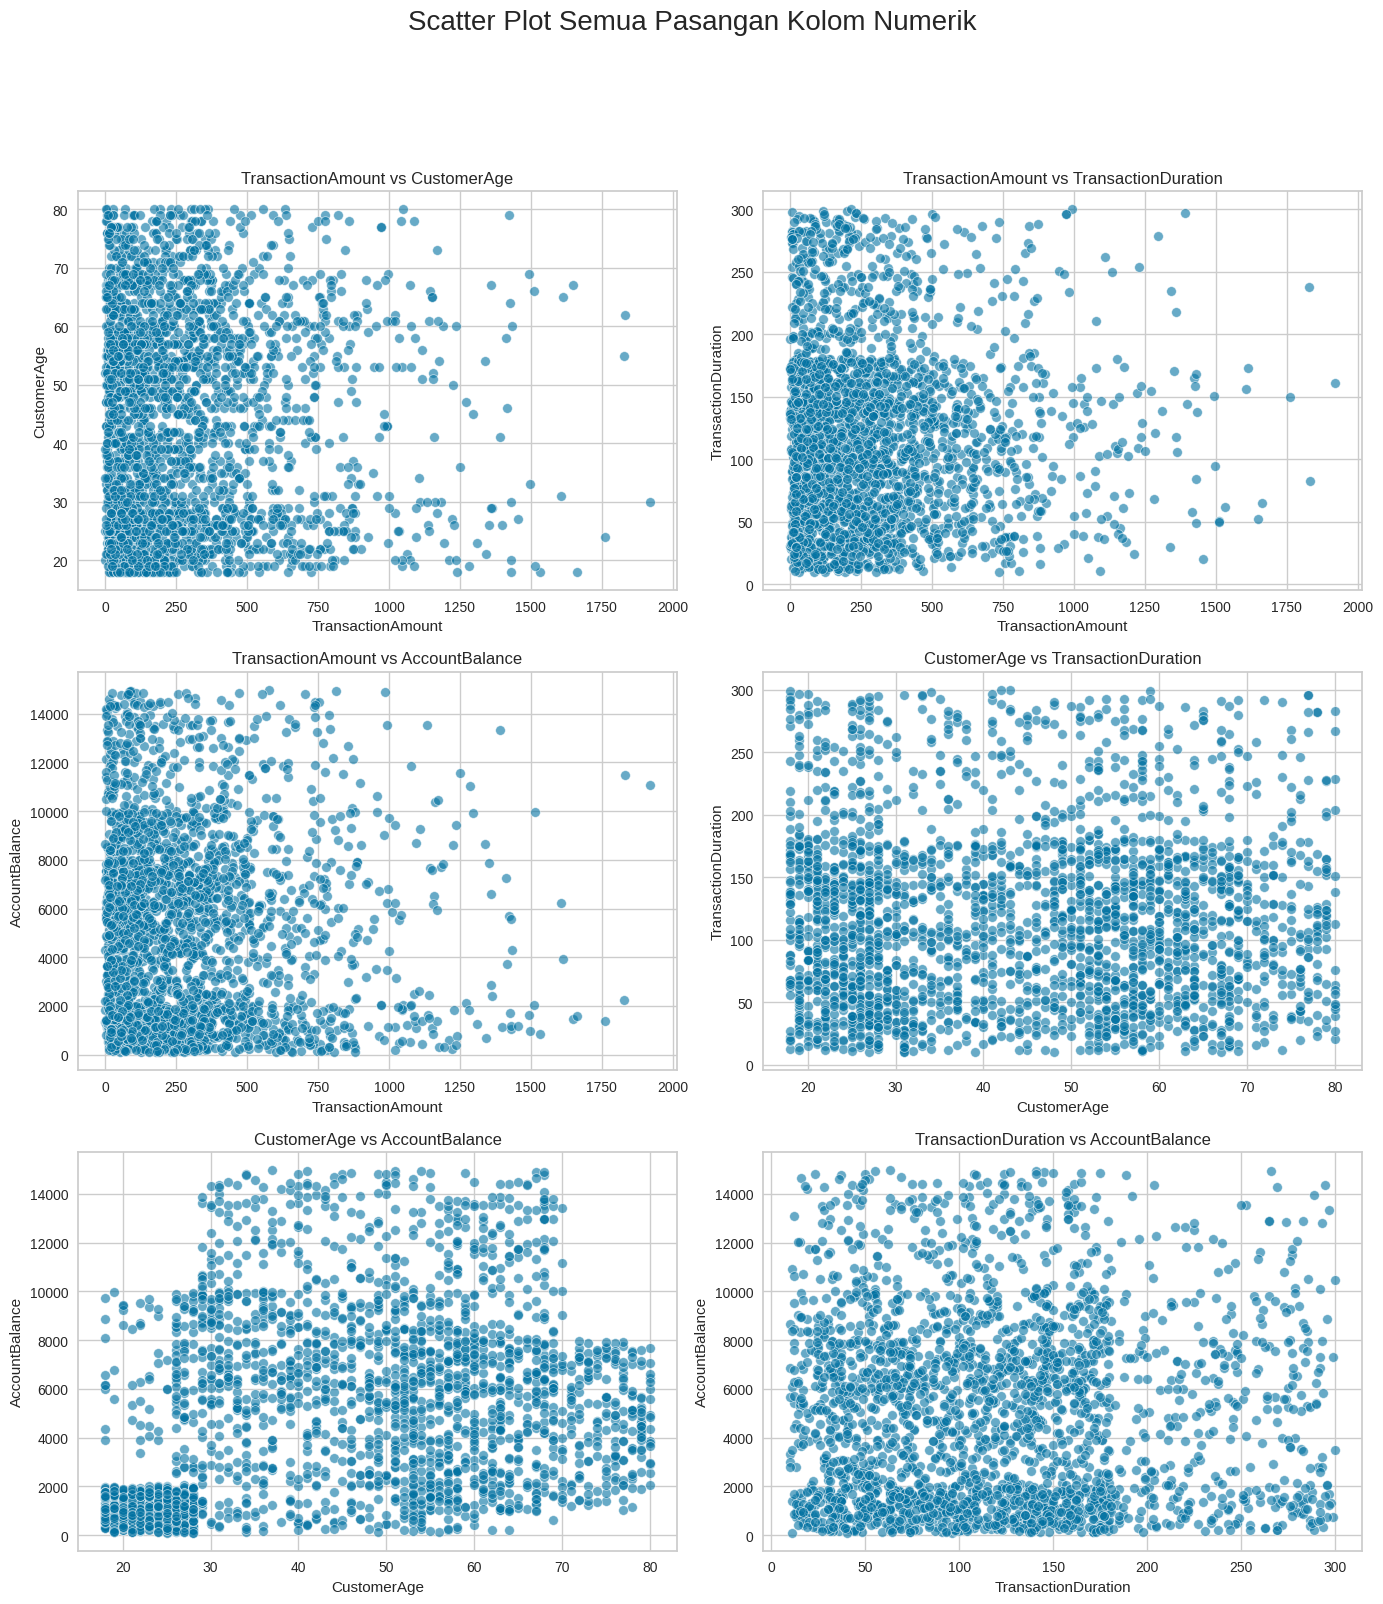

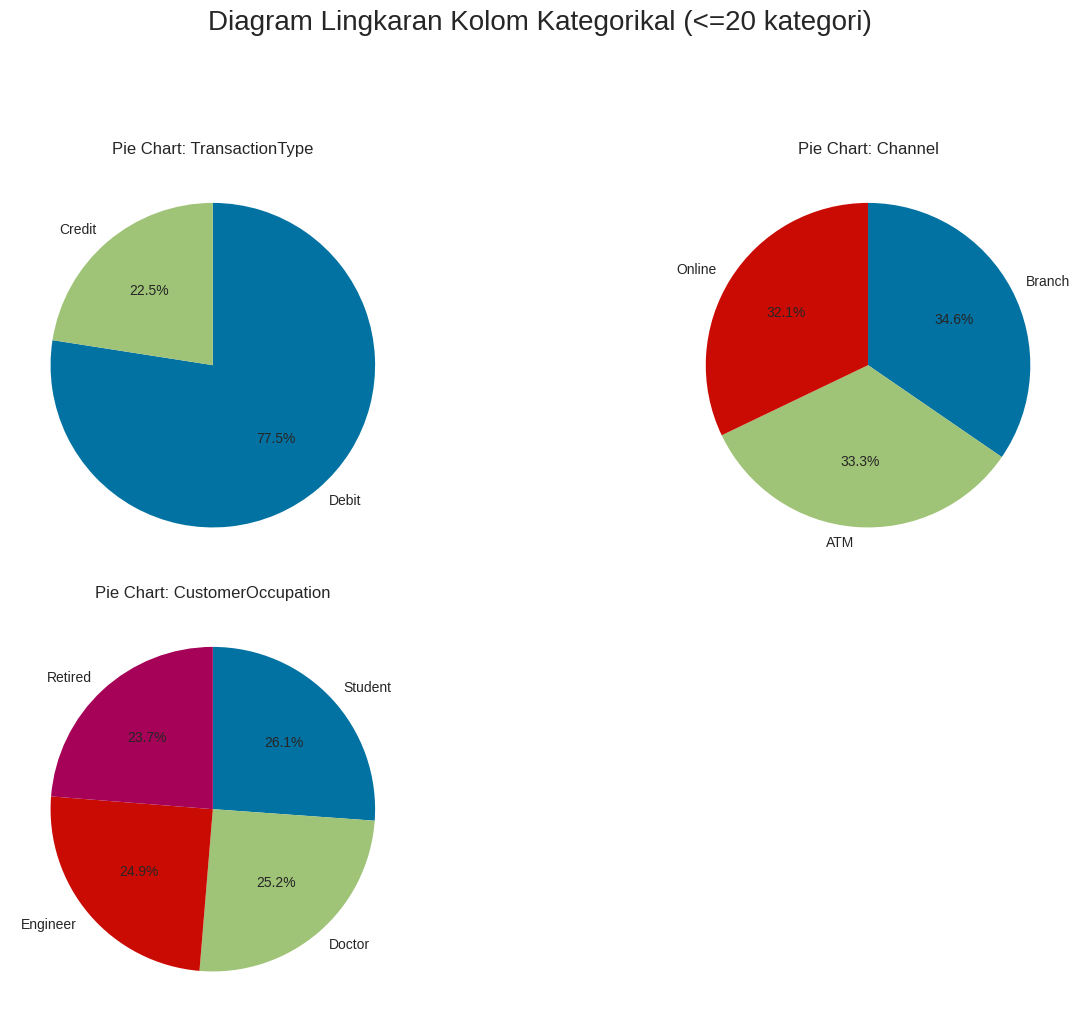

In [40]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
numeric_cols = data_for_histogram.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data_for_histogram.select_dtypes(include='object').columns

# Kolom yang numerik
combinations = list(itertools.combinations(numeric_cols, 2))

cols_per_row = 2
rows = (len(combinations) // cols_per_row) + 1

plt.figure(figsize=(14, 5 * rows))
plt.suptitle("Scatter Plot Semua Pasangan Kolom Numerik", fontsize=20, y=1.02)

for i, (x_col, y_col) in enumerate(combinations):
  plt.subplot(rows, cols_per_row, i + 1)
  sns.scatterplot(data=data_for_histogram, x=x_col, y=y_col, alpha=0.6)
  plt.title(f'{x_col} vs {y_col}')
  plt.xlabel(x_col)
  plt.ylabel(y_col)
  plt.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# Kolom yang kategori
selected_cats = [col for col in categorical_cols if data_for_histogram[col].nunique() <= 20]

cols_per_row = 2
rows = (len(selected_cats) // cols_per_row) + 1

plt.figure(figsize=(14, 5 * rows))
plt.suptitle("Diagram Lingkaran Kolom Kategorikal (<=20 kategori)", fontsize=20, y=1.02)

for i, col in enumerate(selected_cats):
  plt.subplot(rows, cols_per_row, i + 1)
  data_for_histogram[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, counterclock=False,textprops={'fontsize': 10})
  plt.ylabel('')
  plt.title(f'Pie Chart: {col}')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `pd.get_dummies()` atau `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [41]:
# Melakukan drop pada kolom yang memiliki keterangan id
# Saya menghapus semua kolom yang variasinya terlalu banyak. Dan menghapus kolom yang nilai nya sama semua
data.drop(['TransactionID', 'AccountID', 'TransactionDate', 'IP Address', 'DeviceID', 'MerchantID', 'PreviousTransactionDate', 'Location', 'LoginAttempts'], axis=1, inplace=True)

In [42]:
# Mengecek dataset menggunakan isnull().sum()
missing_values = data.isnull().sum()

# Karena semua data null kurang dari 100 dan hanya 0.5% dari jumlah data. jadi semua kolom kita isi nilai yang null
# Numerik kolom
all_columns = missing_values[missing_values < 100].index
numeric_features = data[all_columns].select_dtypes(include=['number']).columns
kategorical_features = data[all_columns].select_dtypes(include=['object']).columns

missing_values[missing_values > 0]

,0
TransactionAmount,26
TransactionType,30
Channel,27
CustomerAge,18
CustomerOccupation,23
TransactionDuration,26
AccountBalance,27


In [43]:
# Mengecek dataset menggunakan duplicated().sum()
def countDuplicate(data):
  duplicate_values = data.duplicated().sum()
  print("Data duplikat:", duplicate_values[duplicate_values > 0].sum())

countDuplicate(data)

Data duplikat: 25


In [44]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
scaler = MinMaxScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

data.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,AccountBalance
0,0.007207,Debit,ATM,0.838710,Doctor,0.244828,0.336832
1,0.195940,Debit,ATM,0.806452,Doctor,0.451724,0.918055
2,0.065680,Debit,Online,0.016129,Student,0.158621,0.068637
3,0.096016,Debit,Online,0.129032,Student,0.051724,0.569198
4,0.006874,Credit,Online,NaN,Student,0.648276,0.492591


In [45]:
# Melakukan feature encoding menggunakan pd.get_dummies() atau LabelEncoder() untuk fitur kategorikal.
for column in kategorical_features:
  data[column] = data[column].fillna(data[column].mode()[0])

label_encoders = {}
data = pd.DataFrame(data)

for col in kategorical_features:
  le = LabelEncoder()
  data[col] = le.fit_transform(data[col])
  label_encoders[col] = le

data.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,AccountBalance
0,0.007207,1,0,0.838710,0,0.244828,0.336832
1,0.195940,1,0,0.806452,0,0.451724,0.918055
2,0.065680,1,2,0.016129,3,0.158621,0.068637
3,0.096016,1,2,0.129032,3,0.051724,0.569198
4,0.006874,0,2,NaN,3,0.648276,0.492591


(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [46]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
# Menigisi null dengan nilai median
data[numeric_features] = data[numeric_features].fillna(data[numeric_features].median())

In [47]:
# Menghapus data duplikat menggunakan drop_duplicates().
data = data.drop_duplicates()
countDuplicate(data)

Data duplikat: 0


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

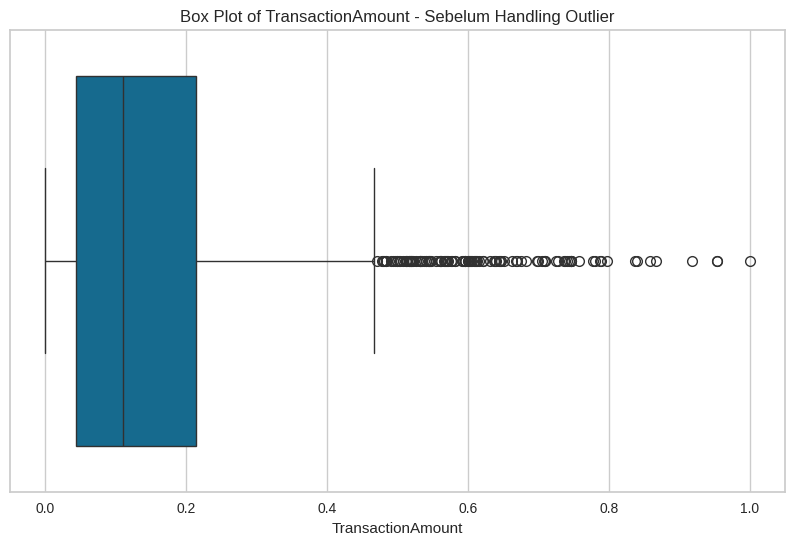

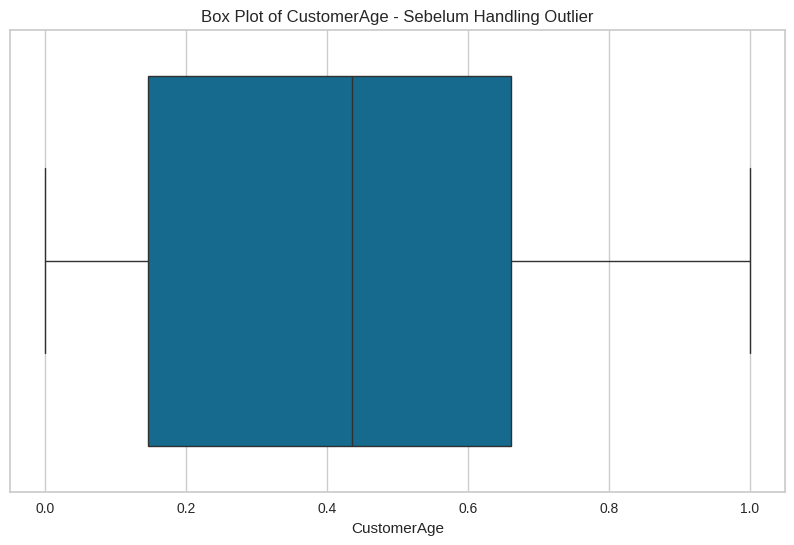

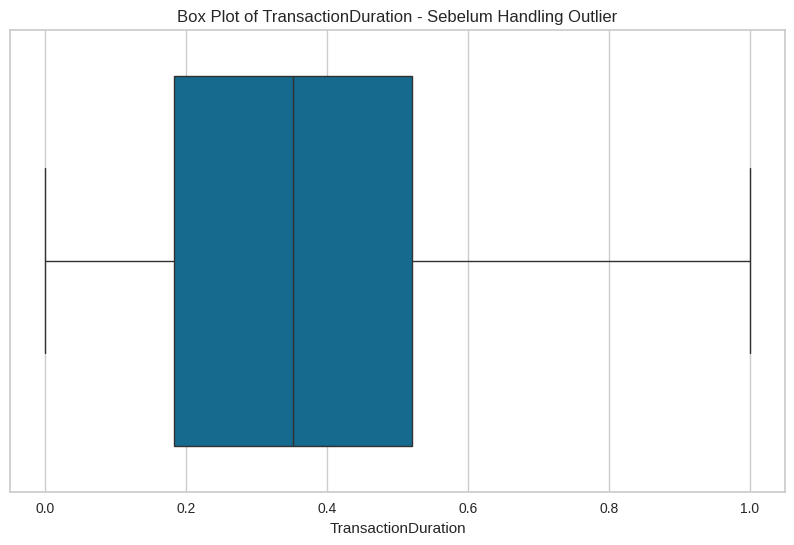

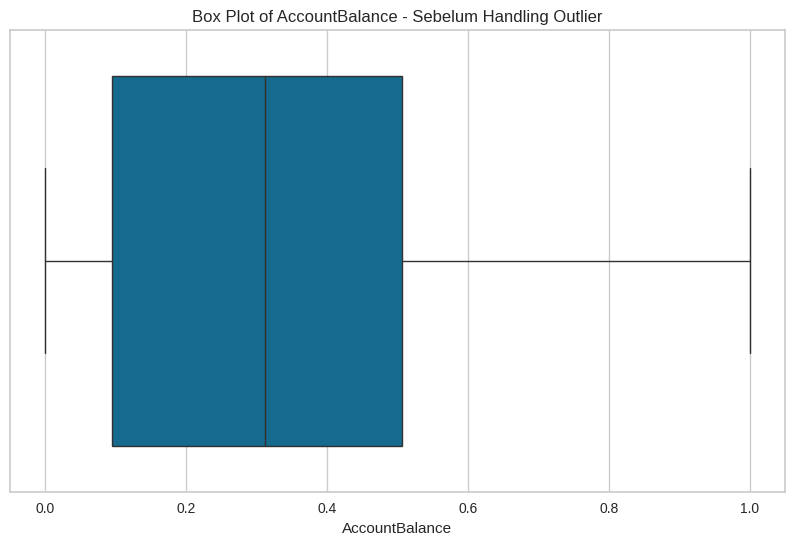

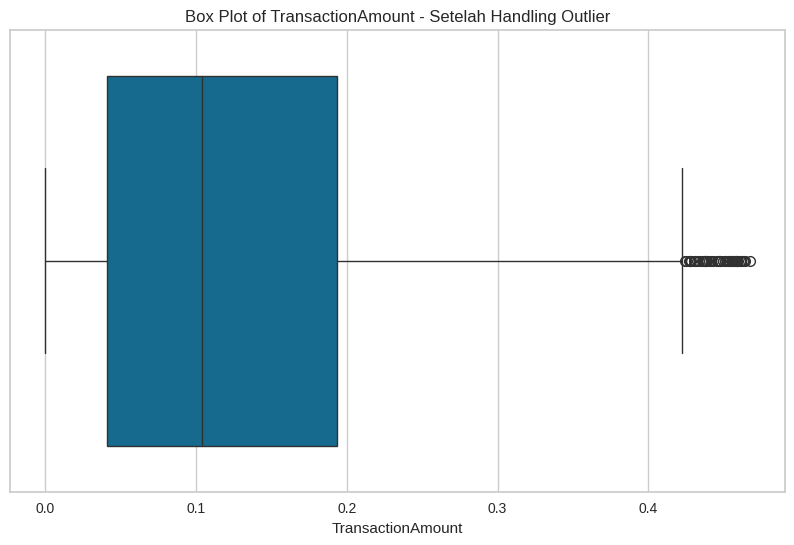

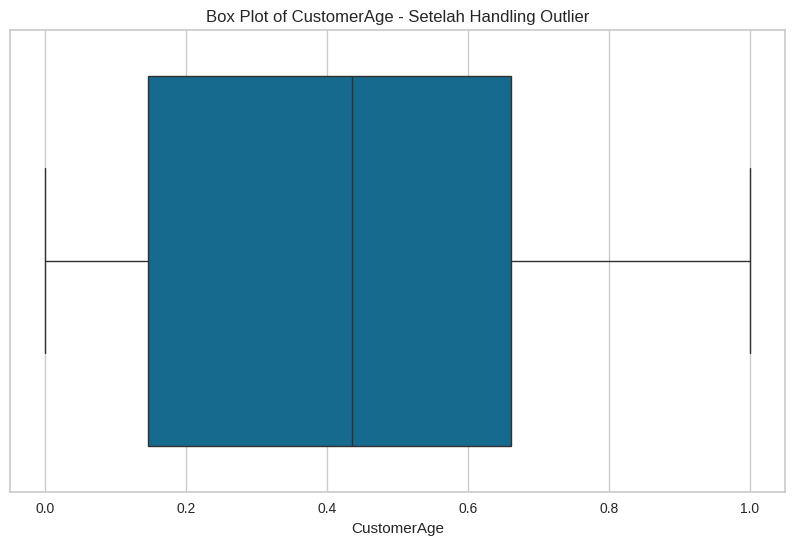

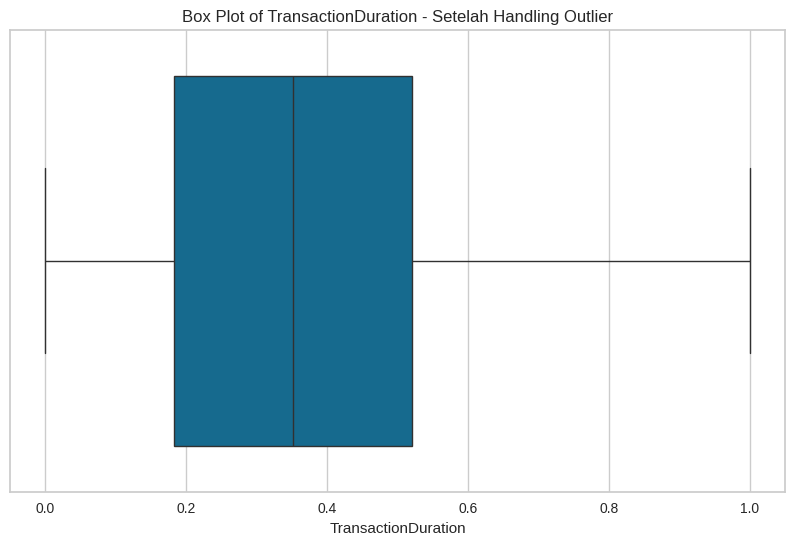

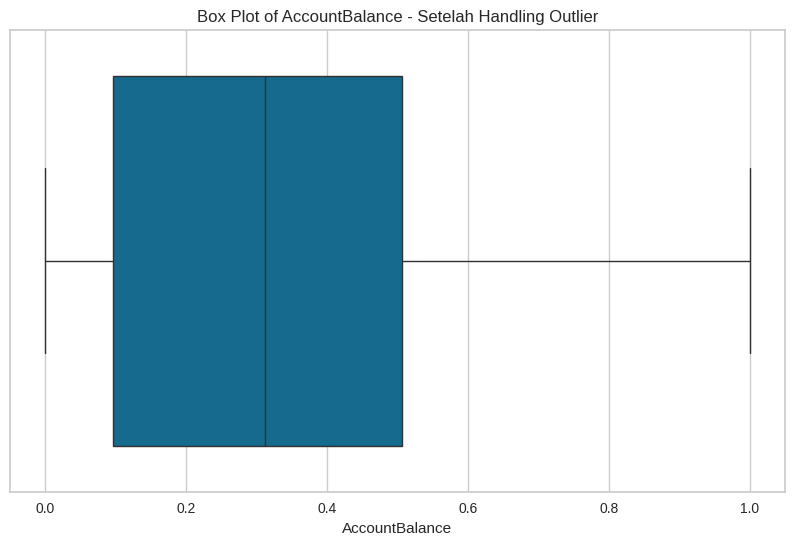

In [48]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
def boxPlotNumericColumn(message):
  for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[feature])
    plt.title(f'Box Plot of {feature} - {message}')
    plt.show()

# Sebelum handling outliers
boxPlotNumericColumn('Sebelum Handling Outlier')

Q1 = data[numeric_features].quantile(0.25)
Q3 = data[numeric_features].quantile(0.75)
IQR = Q3 - Q1

condition = ~((data[numeric_features] < (Q1 - 1.5 * IQR)) | (data[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)
data = data.loc[condition]

# Setelah handling outliers
boxPlotNumericColumn('Setelah Handling Outlier')

In [49]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder atau get_dummies.
bins_amount = [0, 0.2, 0.5, 1.0]
labels_amount = ['low', 'medium', 'high']
data['TransactionAmount_binned'] = pd.cut(data['TransactionAmount'], bins=bins_amount, labels=labels_amount)

bins_age = [0, 0.33, 0.66, 1.0]
labels_age = ['young', 'adult', 'senior']
data['CustomerAge_binned'] = pd.cut(data['CustomerAge'], bins=bins_age, labels=labels_age)

data.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,AccountBalance,TransactionAmount_binned,CustomerAge_binned
0,0.007207,1,0,0.838710,0,0.244828,0.336832,low,senior
1,0.195940,1,0,0.806452,0,0.451724,0.918055,low,senior
2,0.065680,1,2,0.016129,3,0.158621,0.068637,low,young
3,0.096016,1,2,0.129032,3,0.051724,0.569198,low,young
4,0.006874,0,2,0.435484,3,0.648276,0.492591,low,adult


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
2. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
3. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [50]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()
data.describe()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,AccountBalance
count,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000
mean,0.132572,0.774489,0.990413,0.430246,1.518133,0.377440,0.338502
std,0.112471,0.418005,0.803137,0.285506,1.133860,0.240600,0.260725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040991,1.000000,0.000000,0.145161,0.000000,0.182759,0.096091
50%,0.104010,1.000000,1.000000,0.435484,2.000000,0.351724,0.311416
75%,0.193512,1.000000,2.000000,0.661290,3.000000,0.520690,0.506946
max,0.467223,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000


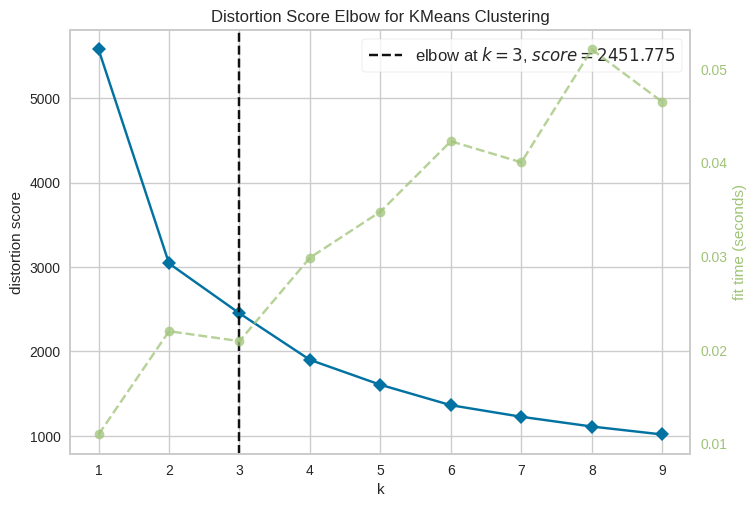

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [51]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
arr = data.iloc[:, [0,1,2,3,4,5,6]].values

kmeans = KMeans(n_init=10, random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(arr)
visualizer.show()

In [52]:
# Menggunakan algoritma K-Means Clustering
k = visualizer.elbow_value_
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(arr)

labels = kmeans.labels_

Jalankan cell code ini untuk menyimpan model kamu.

In [53]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [54]:
# Menghitung dan menampilkan nilai Silhouette Score.
score = silhouette_score(arr, labels)
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.3371


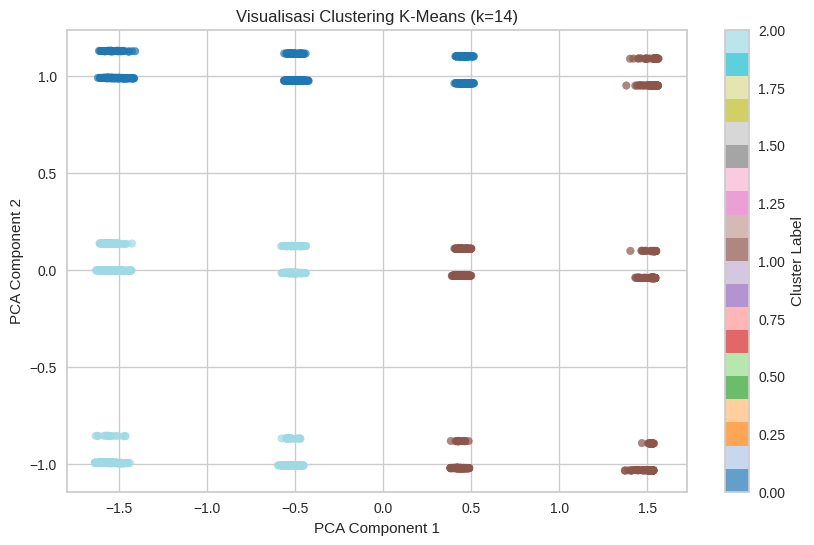

In [55]:
# Membuat visualisasi hasil clustering
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(arr)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    reduced_data[:, 0], reduced_data[:, 1],
    c=labels, cmap='tab20', s=30, alpha=0.7
)
plt.title("Visualisasi Clustering K-Means (k=14)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label="Cluster Label")
plt.grid(True)
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [56]:
# Membangun model menggunakan PCA.
pca = PCA(n_components=2)
model = pca.fit_transform(arr)

In [57]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")
joblib.dump(model, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [58]:
# Menampilkan analisis deskriptif minimal mean untuk fitur numerik dan modus untuk fitur kategorikal.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

def analyze_clusters(X, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        cluster_data = X[labels == cluster_id]

        min_TransactionAmount = cluster_data[:, 0].min()
        mean_TransactionAmount = cluster_data[:, 0].mean()
        max_TransactionAmount = cluster_data[:, 0].max()
        modus_TransactionType = stats.mode(cluster_data[:, 1]).mode.item()
        modus_Channel = stats.mode(cluster_data[:, 2]).mode.item()
        min_CustomerAge = cluster_data[:, 3].min()
        mean_CustomerAge = cluster_data[:, 3].mean()
        max_CustomerAge = cluster_data[:, 3].max()
        modus_CustomerOccupation = stats.mode(cluster_data[:, 4]).mode.item()
        min_TransactionDuration = cluster_data[:, 5].min()
        mean_TransactionDuration = cluster_data[:, 5].mean()
        max_TransactionDuration = cluster_data[:, 5].max()
        min_AccountBalance = cluster_data[:, 6].min()
        mean_AccountBalance = cluster_data[:, 6].mean()
        max_AccountBalance = cluster_data[:, 6].max()

        print(f"\nCluster {cluster_id + 1}:")
        print(f"Min Transaction Amount : {min_TransactionAmount:.3f}")
        print(f"Rata-rata Transaction Amount : {mean_TransactionAmount:.3f}")
        print(f"Max Transaction Amount : {max_TransactionAmount:.3f}")
        print(f"Modus Transaction Type : {label_encoders['TransactionType'].classes_[int(modus_TransactionType)]}")
        print(f"Modus Channel : {label_encoders['Channel'].classes_[int(modus_Channel)]}")
        print(f"Min Customer Age : {min_CustomerAge:.3f}")
        print(f"Rata-rata Customer Age : {mean_CustomerAge:.3f}")
        print(f"Max Customer Age : {max_CustomerAge:.3f}")
        print(f"Modus Customer Occupation : {label_encoders['CustomerOccupation'].classes_[int(modus_CustomerOccupation)]}")
        print(f"Min Transaction Duration : {min_TransactionDuration:.3f}")
        print(f"Rata-rata Transaction Duration : {mean_TransactionDuration:.3f}")
        print(f"Max Transaction Duration : {max_TransactionDuration:.3f}")
        print(f"Min Account Balance : {min_AccountBalance:.3f}")
        print(f"Rata-rata Account Balance : {mean_AccountBalance:.3f}")
        print(f"Max Account Balance : {max_AccountBalance:.3f}")

analyze_clusters(arr, labels, k)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Min Transaction Amount : 0.001
Rata-rata Transaction Amount : 0.132
Max Transaction Amount : 0.467
Modus Transaction Type : Debit
Modus Channel : Online
Min Customer Age : 0.129
Rata-rata Customer Age : 0.543
Max Customer Age : 1.000
Modus Customer Occupation : Engineer
Min Transaction Duration : 0.000
Rata-rata Transaction Duration : 0.372
Max Transaction Duration : 0.986
Min Account Balance : 0.009
Rata-rata Account Balance : 0.415
Max Account Balance : 0.992

Cluster 2:
Min Transaction Amount : 0.000
Rata-rata Transaction Amount : 0.135
Max Transaction Amount : 0.462
Modus Transaction Type : Debit
Modus Channel : Branch
Min Customer Age : 0.000
Rata-rata Customer Age : 0.345
Max Customer Age : 1.000
Modus Customer Occupation : Student
Min Transaction Duration : 0.003
Rata-rata Transaction Duration : 0.380
Max Transaction Duration : 0.997
Min Account Balance : 0.000
Rata-rata Account Balance : 0.181
Max Account Balance : 0.854

Clust

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya sebelum inverse.
1. **Cluster 1:**
  - **Rata-rata Transaction Amount:** Sebelum inverse (0.132)
  - **Min Transaction Amount:** Sebelum inverse (0.001)
  - **Max Transaction Amount:** Sebelum inverse (0.467)
  - **Modus Transaction Type:** Debit
  - **Modus Channel:** Online
  - **Rata-rata Customer Age:** Sebelum inverse (0.543)
  - **Min Customer Age:** Sebelum inverse (0.129)
  - **Max Customer Age:** Sebelum inverse (1.000)
  - **Modus Customer Occupation:** Engineer
  - **Rata-rata Transaction Duration:** Sebelum inverse (0.372)
  - **Min Transaction Duration:** Sebelum inverse (0.000)
  - **Max Transaction Duration:** Sebelum inverse (0.986)
  - **Rata-rata Account Balance:** Sebelum inverse (0.415)
  - **Min Account Balance:** Sebelum inverse (0.009)
  - **Max Account Balance:** Sebelum inverse (0.992)
  - **Analisis:** Cluster ini terdiri dari pelanggan yang umumnya bertransaksi secara online dengan tipe transaksi debit. Mereka cenderung berusia lebih tua dengan pekerjaan sebagai engineer dan memiliki saldo akun yang cukup tinggi.

3. **Cluster 2:**
  - **Rata-rata Transaction Amount:** Sebelum inverse (0.135)
  - **Min Transaction Amount:** Sebelum inverse (0.000)
  - **Max Transaction Amount:** Sebelum inverse (0.462)
  - **Modus Transaction Type:** Debit
  - **Modus Channel:** Branch
  - **Rata-rata Customer Age:** Sebelum inverse (0.345)
  - **Min Customer Age:** Sebelum inverse (0.000)
  - **Max Customer Age:** Sebelum inverse (1.000)
  - **Modus Customer Occupation:** Student
  - **Rata-rata Transaction Duration:** Sebelum inverse (0.379)
  - **Min Transaction Duration:** Sebelum inverse (0.003)
  - **Max Transaction Duration:** Sebelum inverse (0.997)
  - **Rata-rata Account Balance:** Sebelum inverse (0.180)
  - **Min Account Balance:** Sebelum inverse (0.000)
  - **Max Account Balance:** Sebelum inverse (0.854)
  - **Analisis:** Cluster ini terdiri dari pelanggan yang umumnya bertransaksi di cabang dengan tipe transaksi debit. Mereka cenderung lebih muda dengan pekerjaan di bidang pendidikan dan memiliki saldo akun yang lebih rendah dibandingkan cluster lainnya.

3. **Cluster 3:**
  - **Rata-rata Transaction Amount:** Sebelum inverse (0.130)
  - **Min Transaction Amount:** Sebelum inverse (0.000)
  - **Max Transaction Amount:** Sebelum inverse (0.461)
  - **Modus Transaction Type:** Debit
  - **Modus Channel:** Branch
  - **Rata-rata Customer Age:** Sebelum inverse (0.460)
  - **Min Customer Age:** Sebelum inverse (0.129)
  - **Max Customer Age:** Sebelum inverse (0.839)
  - **Modus Customer Occupation:** Doctor
  - **Rata-rata Transaction Duration:** Sebelum inverse (0.378)
  - **Min Transaction Duration:** Sebelum inverse (0.000)
  - **Max Transaction Duration:** Sebelum inverse (1.000)
  - **Rata-rata Account Balance:** Sebelum inverse (0.483)
  - **Min Account Balance:** Sebelum inverse (0.001)
  - **Max Account Balance:** Sebelum inverse (1.000)
  - **Analisis:** Cluster ini terdiri dari pelanggan yang umumnya bertransaksi di cabang dengan tipe transaksi debit. Mereka cenderung berusia menengah dengan pekerjaan sebagai doctor dan memiliki saldo akun yang sangat tinggi.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [59]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
data['Target'] = labels

In [60]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)
data.to_csv('clustered_data.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [61]:
# inverse dataset ke rentang normal
data[numeric_features] = scaler.inverse_transform(data[numeric_features])

data.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,AccountBalance,TransactionAmount_binned,CustomerAge_binned,Target
0,14.09,1,0,70.0,0,81.0,5112.21,low,senior,2
1,376.24,1,0,68.0,0,141.0,13758.91,low,senior,2
2,126.29,1,2,19.0,3,56.0,1122.35,low,young,1
3,184.50,1,2,26.0,3,25.0,8569.06,low,young,1
4,13.45,0,2,45.0,3,198.0,7429.40,low,adult,1


In [62]:
arr_inverse = data.iloc[:, [0,1,2,3,4,5,6]].values

analyze_clusters(arr_inverse, labels, k)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Min Transaction Amount : 1.820
Rata-rata Transaction Amount : 254.293
Max Transaction Amount : 896.790
Modus Transaction Type : Debit
Modus Channel : Online
Min Customer Age : 26.000
Rata-rata Customer Age : 51.637
Max Customer Age : 80.000
Modus Customer Occupation : Engineer
Min Transaction Duration : 10.000
Rata-rata Transaction Duration : 118.011
Max Transaction Duration : 296.000
Min Account Balance : 234.410
Rata-rata Account Balance : 6276.336
Max Account Balance : 14852.420

Cluster 2:
Min Transaction Amount : 0.260
Rata-rata Transaction Amount : 259.443
Max Transaction Amount : 886.190
Modus Transaction Type : Debit
Modus Channel : Branch
Min Customer Age : 18.000
Rata-rata Customer Age : 39.405
Max Customer Age : 80.000
Modus Customer Occupation : Student
Min Transaction Duration : 11.000
Rata-rata Transaction Duration : 120.059
Max Transaction Duration : 299.000
Min Account Balance : 101.250
Rata-rata Account Balance : 2792.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1:**
  - **Rata-rata Transaction Amount:** Sebelum inverse (0.132), Setelah inverse (254.293)
  - **Min Transaction Amount:** Sebelum inverse (0.001), Setelah inverse (1.820)
  - **Max Transaction Amount:** Sebelum inverse (0.467), Setelah inverse (896.790)
  - **Modus Transaction Type:** Debit
  - **Modus Channel:** Online
  - **Rata-rata Customer Age:** Sebelum inverse (0.543), Setelah inverse (51.637)
  - **Min Customer Age:** Sebelum inverse (0.129), Setelah inverse (26.000)
  - **Max Customer Age:** Sebelum inverse (1.000), Setelah inverse (80.000)
  - **Modus Customer Occupation:** Engineer
  - **Rata-rata Transaction Duration:** Sebelum inverse (0.372), Setelah inverse (118.01)
  - **Min Transaction Duration:** Sebelum inverse (0.000), Setelah inverse (10.000)
  - **Max Transaction Duration:** Sebelum inverse (0.986), Setelah inverse (296.000)
  - **Rata-rata Account Balance:** Sebelum inverse (0.415), Setelah inverse (6276.33)
  - **Min Account Balance:** Sebelum inverse (0.009), Setelah inverse (234.410)
  - **Max Account Balance:** Sebelum inverse (0.992), Setelah inverse (14852.420)
  - **Analisis:** Cluster ini terdiri dari pelanggan yang umumnya bertransaksi secara online dengan tipe transaksi debit. Mereka cenderung berusia lebih tua dengan pekerjaan sebagai engineer dan memiliki saldo akun yang cukup tinggi.

3. **Cluster 2:**
  - **Rata-rata Transaction Amount:** Sebelum inverse (0.135), Setelah inverse (259.443)
  - **Min Transaction Amount:** Sebelum inverse (0.000), Setelah inverse (0.260)
  - **Max Transaction Amount:** Sebelum inverse (0.462), Setelah inverse (886.190)
  - **Modus Transaction Type:** Debit
  - **Modus Channel:** Branch
  - **Rata-rata Customer Age:** Sebelum inverse (0.345), Setelah inverse (39.405)
  - **Min Customer Age:** Sebelum inverse (0.000), Setelah inverse (18.000)
  - **Max Customer Age:** Sebelum inverse (1.000), Setelah inverse (80.000)
  - **Modus Customer Occupation:** Student
  - **Rata-rata Transaction Duration:** Sebelum inverse (0.379), Setelah inverse (120.05)
  - **Min Transaction Duration:** Sebelum inverse (0.003), Setelah inverse (11.000)
  - **Max Transaction Duration:** Sebelum inverse (0.997), Setelah inverse (299.000)
  - **Rata-rata Account Balance:** Sebelum inverse (0.180), Setelah inverse (2792.24)
  - **Min Account Balance:** Sebelum inverse (0.000), Setelah inverse (101.250)
  - **Max Account Balance:** Sebelum inverse (0.854), Setelah inverse (12801.930)
  - **Analisis:** Cluster ini terdiri dari pelanggan yang umumnya bertransaksi di cabang dengan tipe transaksi debit. Mereka cenderung lebih muda dengan pekerjaan di bidang pendidikan dan memiliki saldo akun yang lebih rendah dibandingkan cluster lainnya.

3. **Cluster 3:**
  - **Rata-rata Transaction Amount:** Sebelum inverse (0.130), Setelah inverse (248.875)
  - **Min Transaction Amount:** Sebelum inverse (0.000), Setelah inverse (0.320)
  - **Max Transaction Amount:** Sebelum inverse (0.461), Setelah inverse (885.330)
  - **Modus Transaction Type:** Debit
  - **Modus Channel:** Branch
  - **Rata-rata Customer Age:** Sebelum inverse (0.460), Setelah inverse (46.548)
  - **Min Customer Age:** Sebelum inverse (0.129), Setelah inverse (26.000)
  - **Max Customer Age:** Sebelum inverse (0.839), Setelah inverse (70.000)
  - **Modus Customer Occupation:** Doctor
  - **Rata-rata Transaction Duration:** Sebelum inverse (0.378), Setelah inverse (119.68)
  - **Min Transaction Duration:** Sebelum inverse (0.000), Setelah inverse (10.000)
  - **Max Transaction Duration:** Sebelum inverse (1.000), Setelah inverse (300.000)
  - **Rata-rata Account Balance:** Sebelum inverse (0.483), Setelah inverse (7300.87)
  - **Min Account Balance:** Sebelum inverse (0.001), Setelah inverse (112.760)
  - **Max Account Balance:** Sebelum inverse (1.000), Setelah inverse (14977.990)
  - **Analisis:** Cluster ini terdiri dari pelanggan yang umumnya bertransaksi di cabang dengan tipe transaksi debit. Mereka cenderung berusia menengah dengan pekerjaan sebagai doctor dan memiliki saldo akun yang sangat tinggi.

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [63]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
data['Target'] = labels

In [64]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)
data.to_csv('data_clustering_inverse.csv', index=False)